In [97]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt


In [170]:
results = {
    'problem': 'knapsack',
    'r_hill': {
        'lengths':[], 
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
        'best_fit': []
    },
    'GA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
        'best_fit': []
    },
    'SA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
        'best_fit': []
    },
    'MIMIC': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
        'best_fit': []
    },
}

# Problem Definitions

In [171]:
def knapsack_generator(length):
    values = []
    weights = []
    for i in range(length):
        values = random.sample(range(1, length+1), length)
        weights = random.sample(range(1, length+1), length)
    return values, weights

In [172]:
problem_sets = []
lengths = [4, 6, 8, 16, 32]
for length in lengths:
    problem_sets.append(knapsack_generator(length))
print(problem_sets)

[([3, 1, 2, 4], [3, 2, 1, 4]), ([6, 3, 5, 4, 1, 2], [3, 4, 5, 1, 2, 6]), ([8, 4, 7, 5, 3, 6, 1, 2], [2, 1, 4, 3, 6, 8, 7, 5]), ([9, 3, 13, 16, 4, 7, 10, 6, 5, 2, 11, 1, 12, 8, 15, 14], [4, 15, 9, 3, 2, 8, 5, 7, 10, 14, 16, 6, 12, 1, 13, 11]), ([14, 21, 20, 29, 27, 10, 17, 4, 19, 11, 3, 25, 22, 7, 13, 23, 31, 9, 18, 12, 8, 28, 1, 6, 15, 32, 24, 2, 5, 30, 26, 16], [27, 1, 13, 21, 17, 2, 6, 4, 8, 10, 22, 29, 16, 15, 30, 9, 25, 14, 28, 11, 18, 5, 23, 31, 26, 3, 7, 19, 32, 20, 24, 12])]


In [173]:
length = 32
values_bf, weights_bf = knapsack_generator(length)
print(values)
print(weights)

[2, 25, 6, 9, 13, 20, 15, 28, 19, 32, 4, 16, 11, 3, 30, 18, 21, 8, 1, 26, 5, 10, 7, 23, 12, 17, 22, 29, 27, 24, 14, 31]
[32, 23, 21, 22, 10, 20, 17, 11, 16, 27, 4, 3, 29, 25, 24, 26, 5, 30, 12, 9, 13, 6, 14, 31, 2, 28, 15, 8, 19, 18, 1, 7]


In [174]:
#https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
# knapsack
#values = [1, 4, 5, 7]
#weights = [1, 3 ,4 ,5]

max_weight_pct = 0.6
fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=length, 
                             fitness_fn=fitness_fn
                            )


# Knapsack Problem

## 1.  Random hill climb

In [184]:



problem = mlrose.DiscreteOpt(length = length, 
                             fitness_fn = fitness_fn, 
                            )


In [189]:
max_iters = 10000
restarts = 500
state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                   max_attempts=10,
                                                   max_iters=max_iters, 
                                                   restarts=20, 
                                                   curve=True, 
                                                   init_state=None, 
                                                   random_state=13)
#results['r_hill']['fit_curves'].append(curve)
print(state)
print(fitness)
print(len(curve))


[0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1]
398.0
26


# max_attempts

In [266]:
def test_param(param_name, param_range, problem, algorithm, args, plot=False, alg_name="", prob_name=""):
    fits = []
    best_fit = 0
    best_arg_val = 0
    if param_name == 'decay':
        #this is SA, we need to define schedule
        for p in param_range:
            print(p)
            args['schedule'] = mlrose.GeomDecay(init_temp=10, decay=p, min_temp=0.001)
            state, fitness, curve = algorithm(**args)
            fits.append(fitness)
            if fitness > best_fit:
                best_fit = fitness
                best_arg_val = p
    else:
        for p in param_range:
            args[param_name] = p
            state, fitness, curve = algorithm(**args)
            fits.append(fitness)
            if fitness > best_fit:
                best_fit = fitness
                best_arg_val = p
    print("best value for ", param_name, ": ", best_arg_val)
    print("best fit: ", best_fit)
    if plot:
        plt.plot(param_range, fits, label="r_hill")
        plt.xlabel (param_name)
        plt.ylabel ('fit')
        plt.legend()
        title = "" + alg_name + " " + param_name + " fits " + prob_name
        plt.title (title)
        plt.show()
    return best_arg_val, best_fit
    
    
r_hill_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'max_attempts':400,
    'max_iters':10000, 
    'restarts':20,
    
}
ga_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'pop_size': 200,
    'mutation_prob': 0.5,
    'max_attempts': 100,
    'max_iters': 200,
    
}
sa_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'schedule': mlrose.GeomDecay(init_temp=10, decay=0.99, min_temp=0.001),
    'max_attempts': 100,
    'max_iters': 10000  
}
mimic_args = {
    'problem': problem,
    'curve': True,
    'random_state': 13,
    'pop_size': 100,
    'keep_pct': 0.3,
    'max_attempts': 100,
    'max_iters': 200,
}





best value for  restarts :  256
best fit:  436.0


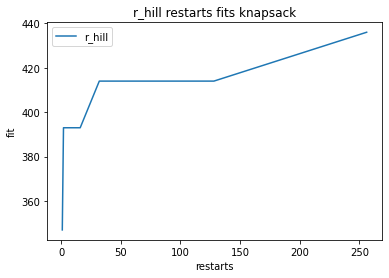

best value for  max_iters :  1024
best fit:  436.0


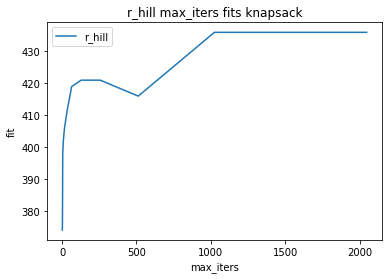

0.85
0.9
0.95
0.99
0.999
best value for  decay :  0.99
best fit:  430.0


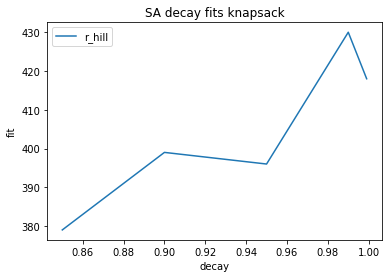

best value for  max_iters :  1024
best fit:  418.0


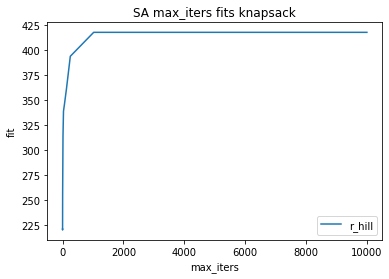

best value for  max_iters :  32
best fit:  466.0


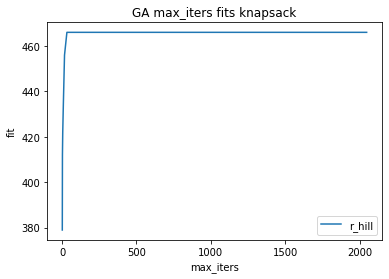

best value for  pop_size :  256
best fit:  466.0


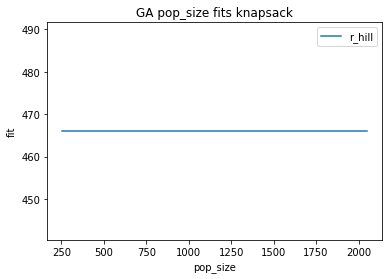

best value for  mutation_prob :  0.1
best fit:  466.0


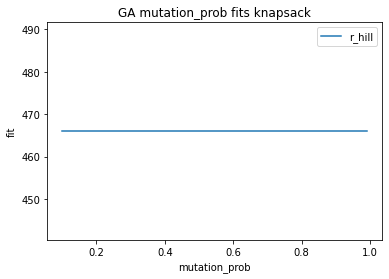

best value for  keep_pct :  0.7
best fit:  466.0


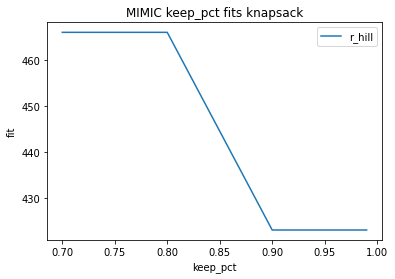

best value for  max_iters :  32
best fit:  466.0


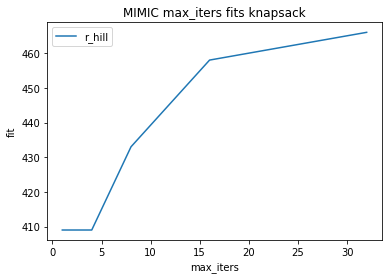

In [279]:
length = 64
values_bf, weights_bf = knapsack_generator(length)
max_weight_pct = 0.6
fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=len(weights), 
                             fitness_fn=fitness_fn
                            )

best_r_hill_fit = 0
best_SA_fit = 0
best_GA_fit = 0
best_MIMIC_fit = 0

#r_hill
restart_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]
arg_val, best_fit = test_param('restarts', restart_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="knapsack")

r_hill_args['restarts'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.random_hill_climb, r_hill_args, plot=True, alg_name="r_hill", prob_name="knapsack")

r_hill_args['max_iters'] = arg_val
best_r_hill_fit = best_fit

#Simulated annealing
decay_range = [0.85, 0.9, 0.95, 0.99, 0.999]
arg_val, best_fit = test_param('decay', decay_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="knapsack")

#its hard to dynamicall set this so i played around with decay manually and set it to optimal initially

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 10000]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.simulated_annealing, sa_args, plot=True, alg_name="SA", prob_name="knapsack")

sa_args['max_iters'] = arg_val
best_SA_fit = best_fit
# genetic algorithm

max_iter_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="knapsack")

ga_args['max_iters'] = arg_val

pop_size_range = [256, 512, 1024, 2048]
arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="knapsack")

ga_args['pop_size'] = arg_val

#mutation_prob_range = np.arange(0.6, 0.9, 0.001)
mutation_prob_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('mutation_prob', mutation_prob_range, problem, mlrose.genetic_alg, ga_args, plot=True, alg_name="GA", prob_name="knapsack")

ga_args['mutation_prob'] = arg_val
best_GA_fit = best_fit
#MIMIC

#pop_size_range = [256, 512, 1024, 2048]
#arg_val, best_fit = test_param('pop_size', pop_size_range, problem, mlrose.mimic ,mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

keep_pct = [0.7, 0.8, 0.9, 0.99]
arg_val, best_fit = test_param('keep_pct', keep_pct, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

mimic_args['keep_pct'] = arg_val

max_iter_range = [1, 2, 4, 8, 16, 32]
arg_val, best_fit = test_param('max_iters', max_iter_range, problem, mlrose.mimic, mimic_args, plot=True, alg_name="MIMIC", prob_name="knapsack")

mimic_args['max_iters'] = arg_val
best_MIMIC_fit = best_fit

best r_hill fit:  436.0
best SA fit:  418.0
best GA fit:  466.0
best mimic fit:  466.0


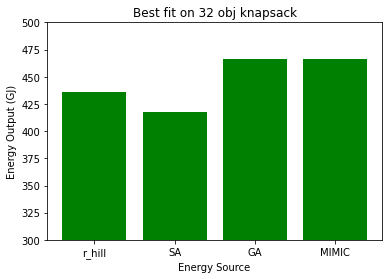

In [280]:
print("best r_hill fit: ", best_r_hill_fit)
print("best SA fit: ", best_SA_fit)
print("best GA fit: ", best_ga_fit)
print("best mimic fit: ", best_MIMIC_fit)
plt.bar("r_hill", best_r_hill_fit, color='green')
plt.bar("SA", best_SA_fit, color='green')
plt.bar("GA", best_ga_fit, color='green')
plt.bar("MIMIC", best_MIMIC_fit, color='green')
plt.xlabel("algorithm")
plt.ylabel("Best Fit")
plt.title("Best fit on 32 obj knapsack")
axes = plt.gca()

axes.set_ylim([300,500])
plt.show()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
[0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1]
422.0
1026


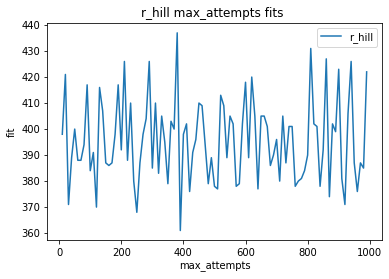

In [193]:
attempt_nums = range(10, 1000, 10)
max_iters = 10000
restarts = 500
fits = []
for max_attempts in attempt_nums:
    #print(max_attempts)
    state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                       max_attempts=max_attempts,
                                                       max_iters=max_iters, 
                                                       restarts=20, 
                                                       curve=True, 
                                                       init_state=None, 
                                                       random_state=13)
    fits.append(fitness)
#results['r_hill']['fit_curves'].append(curve)
print(state)
print(fitness)
print(len(curve))
plt.plot(attempt_nums, fits, label="r_hill")

plt.xlabel ('max_attempts')
plt.ylabel ('fit')
plt.legend()
plt.title ('r_hill max_attempts fits knapsack')
plt.show()

In [194]:
max_iters = range(1, 1000, 1)
max_iters = 10000
restarts = 500
fits = []
for max_attempts in attempt_nums:
    print(max_attempts)
    state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                       max_attempts=400,
                                                       max_iters=max_iters, 
                                                       restarts=20, 
                                                       curve=True, 
                                                       init_state=None, 
                                                       random_state=13)
    fits.append(fitness)
#results['r_hill']['fit_curves'].append(curve)
print(state)
print(fitness)
print(len(curve))
plt.plot(attempt_nums, fits, label="r_hill")

plt.xlabel ('max_attempts')
plt.ylabel ('fit')
plt.legend()
plt.title ('r_hill max_attempts fits knapsack')
plt.show()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450


KeyboardInterrupt: 

###  1.1 Hyperparam analysis

#### 1.1.1 problem complexity

In [144]:
max_iters = 10000
restarts = 5

fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for problem in problem_sets:
    
    start_time = time.time()
    values, weights = problem
    length = len(weights)
    print("starting length ", length)
    fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn
                                )
    state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                     max_attempts = max_attempts, 
                                                     max_iters=max_iters, 
                                                     restarts=restarts[i], 
                                                     curve=True, 
                                                     random_state=13
                                                    )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
7.0
starting length  6
18.0
starting length  8
31.0
starting length  16
92.0
starting length  32
372.0


In [145]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 6, 8, 16, 32]
[7.0, 18.0, 31.0, 92.0, 372.0]
[1.8341081142425537, 1.829843282699585, 1.9396421909332275, 1.8533947467803955, 2.062044143676758]
[10000, 10000, 10000, 10000, 10000]


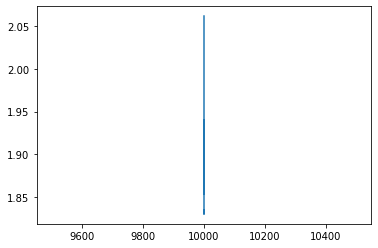

In [146]:
plt.plot(iterations,times)
plt.show()

In [147]:
results['r_hill']['fits'] = fits
results['r_hill']['fit_curves'] = curves
results['r_hill']['iterations'] = iterations
results['r_hill']['times'] = times
results['r_hill']['lengths'] = lengths


## 2. Genetic Algorithm

In [148]:
values = [1, 4, 5, 7]
weights = [1, 3 ,4 ,5]

population_size = 100
mutation_prob = 0.5
max_attempts = 100
max_iters = 200

length = len(weights)

fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                            )
state, fitness, curve = mlrose.genetic_alg(problem, 
                                           pop_size=population_size, 
                                           mutation_prob=mutation_prob, 
                                           max_attempts=max_attempts, 
                                           max_iters=max_iters, 
                                           curve=True, 
                                           random_state=13
                                          )

In [149]:
print(state)
print(fitness)


[0 1 0 1]
11.0


## 2.1 Hyperparam Analysis

In [150]:
population_size = 100
mutation_prob = 0.5
max_attempts = 100
max_iters = 10000

fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]

i = 0
for problem in problem_sets:
    start_time = time.time()
    values, weights = problem
    length = len(weights)
    print("starting length ", length)
    fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                )
    state, fitness, curve = mlrose.genetic_alg(problem, 
                                               max_iters=max_iters, 
                                               curve=True, 
                                               random_state=13
                                              )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
7.0
starting length  6
18.0
starting length  8
32.0
starting length  16
115.0
starting length  32
466.0


In [151]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 6, 8, 16, 32]
[7.0, 18.0, 32.0, 115.0, 466.0]
[0.16215133666992188, 0.18894219398498535, 0.16332721710205078, 0.27506422996520996, 0.5262446403503418]
[11, 11, 11, 18, 32]


In [152]:
results['GA']['fits'] = fits
results['GA']['fit_curves'] = curves
results['GA']['iterations'] = iterations
results['GA']['times'] = times
results['GA']['lengths'] = lengths


## Simulated Annealing

In [153]:
mutation_prob = 0.2
max_attempts = 100
max_iters = 10000

values = [1, 4, 5, 7]
weights = [1, 3 ,4 ,5]
length = 4

fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                            )
schedule = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
state, fitness, curve = mlrose.simulated_annealing(problem, 
                                                   schedule=schedule,
                                                   max_attempts=max_attempts, 
                                                   max_iters=max_iters, 
                                                   curve=True, 
                                                   random_state=13
                                                  )

In [154]:
print(state)
print(fitness)
print(len(curve))


[1 1 1 0]
10.0
157


In [155]:


fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for problem in problem_sets:
    start_time = time.time()
    values, weights = problem
    length = len(weights)
    print("starting length ", length)
    fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                )
    schedule = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
    state, fitness, curve = mlrose.simulated_annealing(problem, 
                                                       schedule=schedule,
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=13
                                                      )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
6.0
starting length  6
15.0
starting length  8
32.0
starting length  16
106.0
starting length  32
396.0


In [156]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 6, 8, 16, 32]
[6.0, 15.0, 32.0, 106.0, 396.0]
[0.008052349090576172, 0.005950927734375, 0.008014917373657227, 0.0069828033447265625, 0.006939411163330078]
[162, 144, 173, 135, 148]


In [157]:
results['SA']['fits'] = fits
results['SA']['fit_curves'] = curves
results['SA']['iterations'] = iterations
results['SA']['times'] = times
results['SA']['lengths'] = lengths

## MIMIC

In [158]:
population_size = 100
max_attempts = 100
max_iters = 100
keep_pct = 0.3

values = [1, 4, 5, 7]
weights = [1, 3 ,4 ,5]
length = 4


fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                            
                            )
state,fitness, curve = mlrose.mimic(problem, 
                                    pop_size = population_size, 
                                    keep_pct = keep_pct, 
                                    max_attempts = max_attempts, 
                                    max_iters = max_iters,  
                                    curve = True, 
                                    random_state = 1
                                   )

In [159]:
print(state)
print(fitness)
print(len(curve))

[0 1 0 1]
11.0
100


In [160]:
population_size = 100
max_attempts = 100
max_iters = 100
keep_pct = 0.3



fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for problem in problem_sets:
    start_time = time.time()
    values, weights = problem
    length = len(weights)
    print("starting length ", length)
    fitness_fn = mlrose.Knapsack(weights, values, max_weight_pct)
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                )
    state,fitness, curve = mlrose.mimic(problem, 
                                    pop_size = population_size, 
                                    keep_pct = keep_pct, 
                                    max_attempts = max_attempts, 
                                    max_iters = max_iters,  
                                    curve = True, 
                                    random_state = 1
                                   )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1                             
                        

starting length  4
7.0
starting length  6
18.0
starting length  8
32.0
starting length  16
115.0
starting length  32
466.0


In [161]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 6, 8, 16, 32]
[7.0, 18.0, 32.0, 115.0, 466.0]
[0.7118840217590332, 1.3730897903442383, 2.2590558528900146, 8.350223064422607, 33.882548809051514]
[100, 100, 100, 100, 100]


In [162]:
results['MIMIC']['fits'] = fits
results['MIMIC']['fit_curves'] = curves
results['MIMIC']['iterations'] = iterations
results['MIMIC']['times'] = times
results['MIMIC']['lengths'] = lengths

# Analysis

[4, 6, 8, 16, 32]


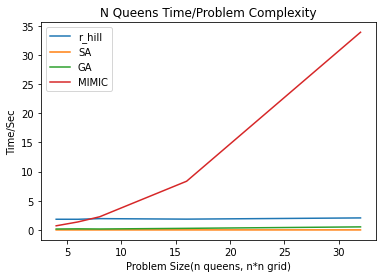

In [164]:
print(results['SA']['lengths'])

plt.plot(results['r_hill']['lengths'],results['r_hill']['times'], label="r_hill")
plt.plot(results['SA']['lengths'],results['SA']['times'], label="SA")
plt.plot(results['GA']['lengths'],results['GA']['times'], label="GA")
plt.plot(results['MIMIC']['lengths'],results['MIMIC']['times'], label="MIMIC")
plt.xlabel ('Problem Size(n queens, n*n grid)')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('N Queens Time/Problem Complexity')
plt.show()

# Finding Best Fit

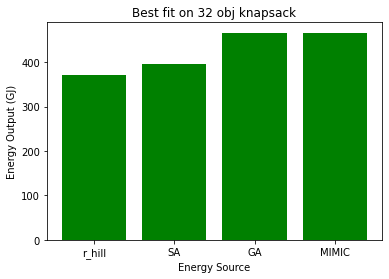

In [168]:
plt.bar("r_hill", results['r_hill']['fits'][4], color='green')
plt.bar("SA", results['SA']['fits'][4], color='green')
plt.bar("GA", results['GA']['fits'][4], color='green')
plt.bar("MIMIC", results['MIMIC']['fits'][4], color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Best fit on 32 obj knapsack")
plt.show()

# Traveling Salesman

In [48]:
def tsp_generator(grid_size, num_cities):
    coords = []
    for i in range(num_cities):
        x = random.randint(0, grid_size[0]-1)
        y = random.randint(0, grid_size[1]-1)
        coords.append((x, y))
    return coords

In [49]:
coords = tsp_generator((9, 9), 8)
print(coords)

[(5, 0), (7, 4), (1, 4), (4, 2), (6, 7), (8, 8), (7, 2), (7, 0)]


In [50]:
fitness_coords = mlrose.TravellingSales(
                                        coords = [
                                                  (1, 1), (4, 2), 
                                                  (5, 2), (6, 4), 
                                                  (4, 4), (3, 6), 
                                                  (1, 5), (2, 3)
                                                 ]
                                        )

In [53]:
fitness = mlrose.TSPOpt(
                        length = 8, 
                        fitness_fn = fitness_coords, 
                        maximize=False
                       )

## Random Hill Climb

In [52]:
state, fitness = mlrose.genetic_alg(
                                    problem_fit, 
                                    random_state = 13
                                   )
print(state)
print(fitness)

ValueError: too many values to unpack (expected 2)